<a href="https://colab.research.google.com/github/udayanjansai/Exploratory_Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dt=sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
dt.shape

(891, 15)

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
dt.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dt.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Missing Values

In [8]:
missing=pd.DataFrame({
    'missing_values':dt.isnull().sum(),
    'missing_percent':(dt.isnull().sum()/len(dt))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_values,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [14]:
#Handling missing values
dt['age'] = dt['age'].fillna(dt['age'].mean())
dt['embarked'] = dt['embarked'].fillna(dt['embarked'].mode()[0])
dt.drop(columns=['deck'],inplace=True, errors='ignore')
print(dt.isnull().sum().sum())

2


In [15]:
missing=pd.DataFrame({
    'missing_values':dt.isnull().sum(),
    'missing_percent':(dt.isnull().sum()/len(dt))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_values,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [17]:
dt.duplicated().sum()

np.int64(111)

In [39]:
dt['class']=dt['class'].astype('category')
dt['sex']=dt['sex'].astype('category')
dt['embarked']=dt['embarked'].astype('category')
dt['age']=dt['age'].astype('float64')

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


In [19]:
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [20]:
dt.shape

(891, 14)

In [27]:
#HIST AND BOX
numcols=dt.select_dtypes(include=['float64','int64']).columns
dt[numcols].describe()

,survived,pclass,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


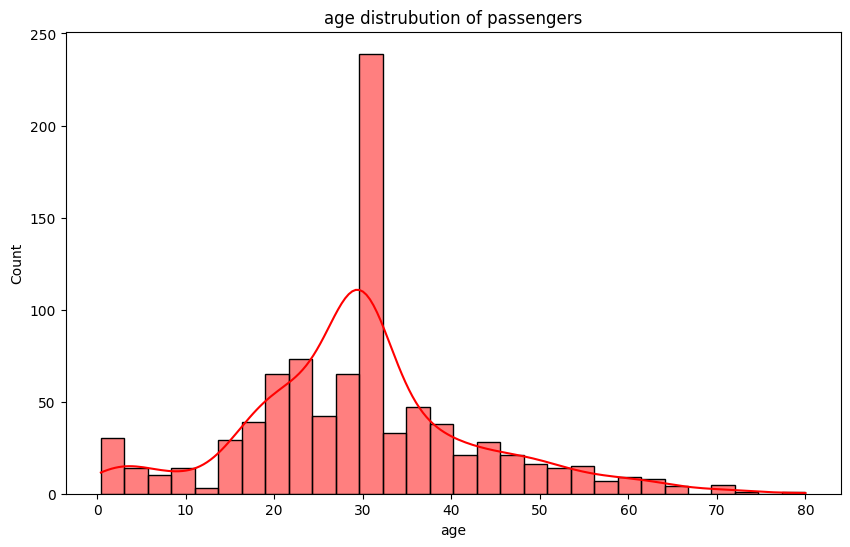

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(dt['age'],bins=30,kde=True,color='red')
plt.title("age distrubution of passengers")
plt.show()

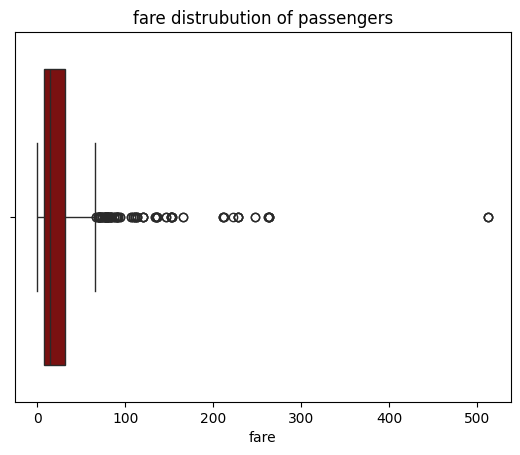

In [41]:
sns.boxplot(x=dt['fare'],color='darkred')
plt.title("fare distrubution of passengers")
plt.show()

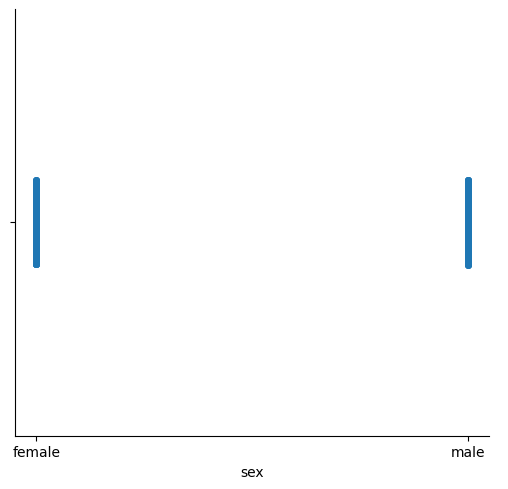

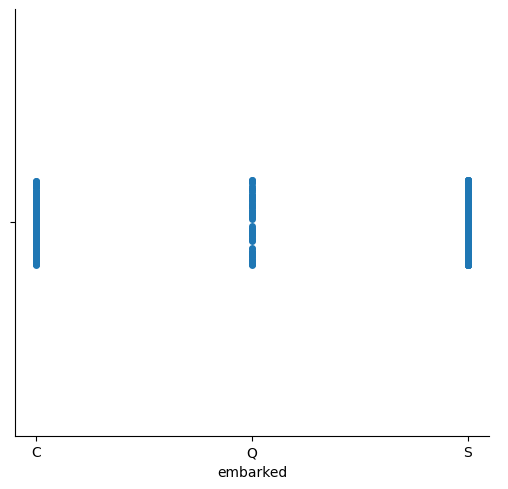

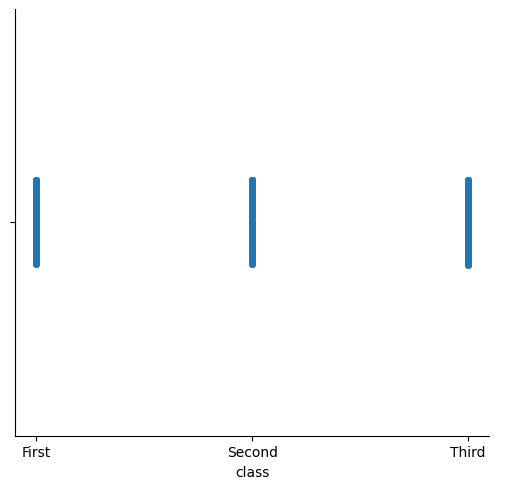

In [43]:
cat=dt.select_dtypes(include=['category']).columns
for col in cat:
  sns.catplot(x=col,data=dt)
  plt.show()

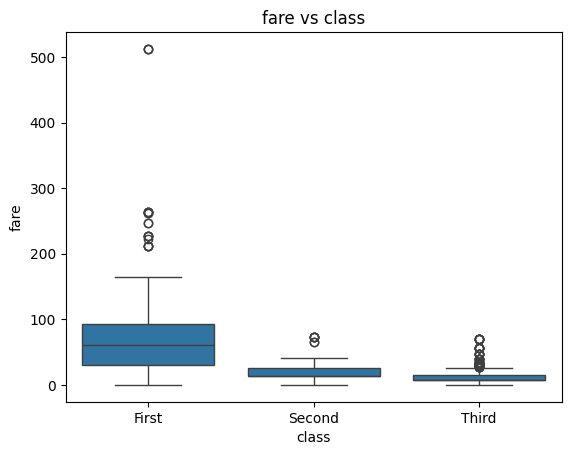

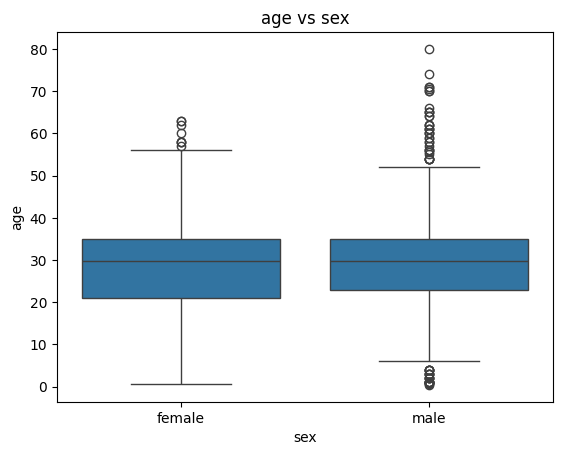

In [46]:
#Bivariate analysis
#numerical vscategorical
sns.boxplot(x='class',y='fare',data=dt)
plt.title("fare vs class")
plt.show()
sns.boxplot(x='sex',y='age',data=dt)
plt.title("age vs sex")
plt.show()

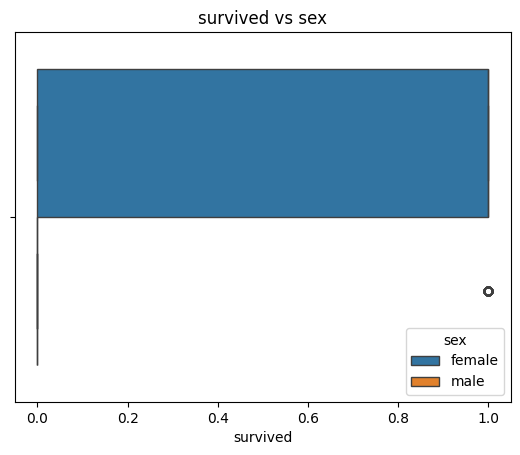

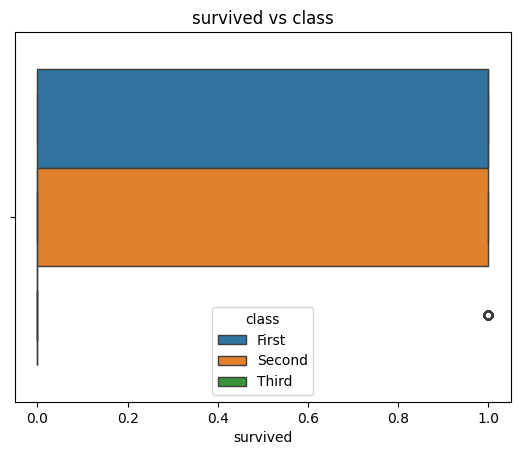

In [47]:
#bivariate cat vs cat
dt['survivied']=dt['survived'].astype('category')
sns.boxplot(x='survived',hue='sex',data=dt)
plt.title("survived vs sex")
plt.show()
sns.boxplot(x='survived',hue='class',data=dt)
plt.title("survived vs class")
plt.show()

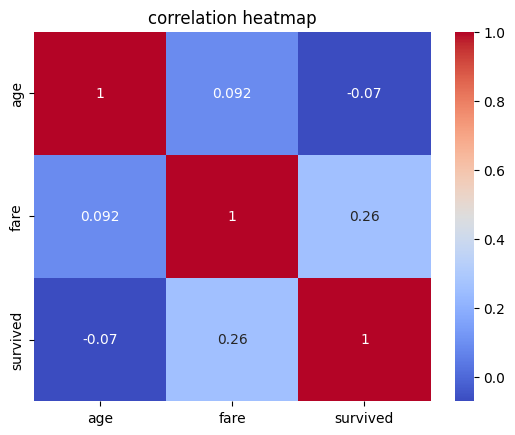

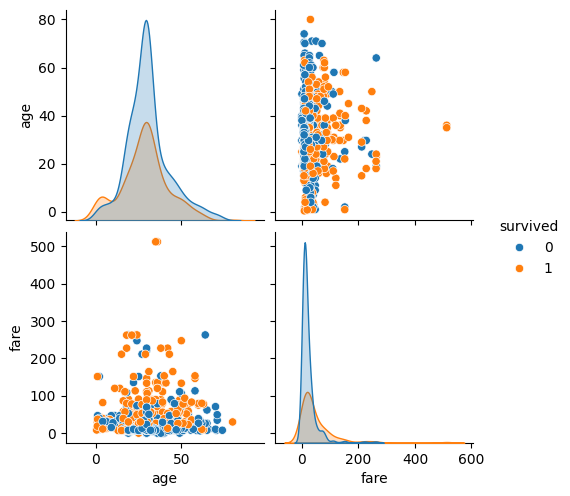

In [53]:
#MUltivariate
dt['survived']=dt['survived'].astype('int64')

corr=dt[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()
sns.pairplot(dt[['age','fare','survived']],hue='survived')
plt.show()

116


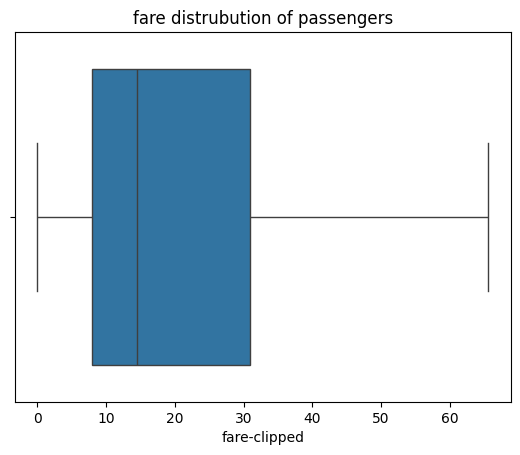

In [55]:
#OUTliers
Q1=dt['fare'].quantile(0.25)
Q3=dt['fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=dt[(dt['fare']<lower_bound)|(dt['fare']>upper_bound)]
print(len(outliers))
dt['fare-clipped']=dt['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x=dt['fare-clipped'])
plt.title("fare distrubution of passengers")
plt.show()

In [57]:
# Export the DataFrame to a CSV file
dt.to_csv('exported_titanic_data.csv', index=False)
print("Data successfully exported to 'exported_titanic_data.csv'")

Data successfully exported to 'exported_titanic_data.csv'
